# Setup

In [1]:
import pickle
import tensorflow as tf

from util import *
from biomedical_qa.models import model_from_config
from biomedical_qa.sampling.squad import SQuADSampler

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("../model_checkpoints/bioasq_finetune_dropout04/config.pickle", 'rb') as f:
    model_config = pickle.load(f)
model = model_from_config(model_config)

In [3]:
rev_vocab = [""] * len(model.embedder.vocab)
for w, i in model.embedder.vocab.items():
    rev_vocab[i] = w

In [5]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
model.model_saver.restore(sess, "../model_checkpoints/bioasq_finetune_dropout04/model.ckpt-3600")
model.set_eval(sess)
sampler = SQuADSampler("../data/BioASQ_squad", ["dev.json"], 1, vocab=model.embedder.vocab)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


# Run Model

In [16]:
b = sampler.get_batch()

start_p, end_p, start_scores, end_scores = model.run(
    sess, [model.predicted_answer_starts, 
           model.predicted_answer_ends,
           model.start_scores,
           model.end_scores], b)

In [17]:
print_question(b, rev_vocab)
print_context(b, rev_vocab)
print_answers(b, rev_vocab)
print_predicted(b, start_p[0], end_p[0], rev_vocab)

Question:
mutations of which genes have been associated with catecholaminergic polymorphic ventricular tachycardia ( cpvt ) ?

Context:
mutation in four genes – ryr2 , casq2 , trdn , and calm1 – is known to cause cpvt or related phenotypes of adrenergically induced life - threatening arrhythmias . the presence of other as - yet unidentified loci is postulated some kcnj2 mutation carriers lack the ats triad and sometimes share the phenotype of catecholaminergic polymorphic ventricular tachycardia ( cpvt ) in 50 japanese probands from unrelated families who satisfied clinical criteria for cpvt , genetic testing was conducted in all exons on 3 cpvt - related genes : cardiac ryanodine receptor 2 ( ryr2 ) , calsequestrin 2 ( casq2 ) and inward rectifier potassium channel 2 ( kcnj2 ) point mutations in ryr2 , the gene encoding for the cardiac isoform of the ryr ( ryr2 ) , are associated with catecholaminergic polymorphic ventricular tachycardia ( cpvt ) , an arrhythmogenic syndrome character

# Pointer Visualization

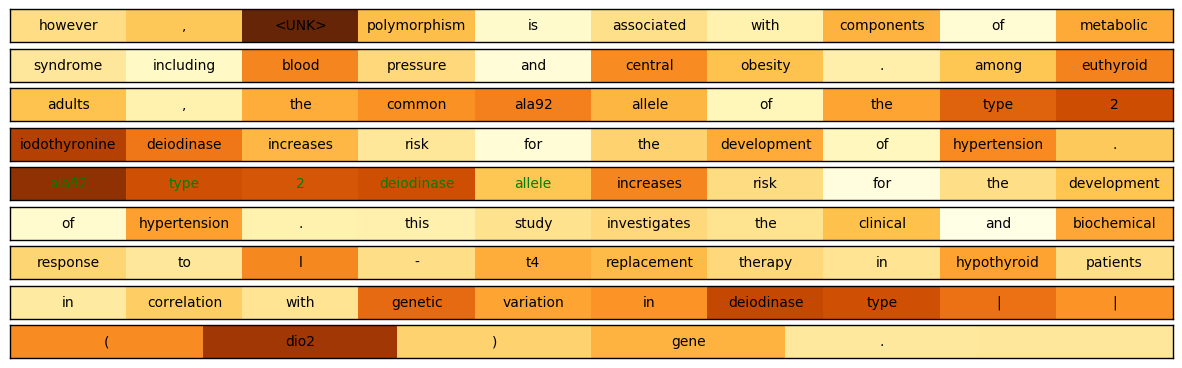

In [8]:
tokens = [rev_vocab[w] for w in b[0].context]
correct_tokens = find_correct_tokens(b)

text_heatmap(tokens, start_scores[-1], correct_tokens)

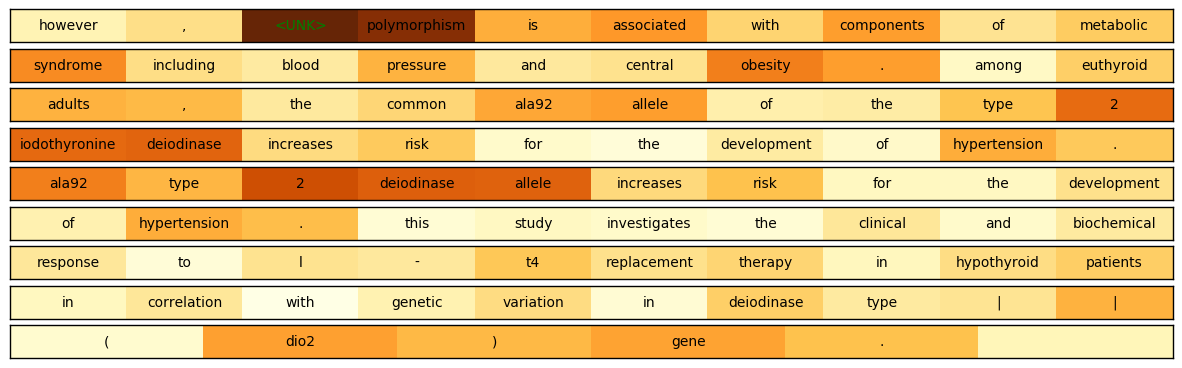

In [9]:
tokens = [rev_vocab[w] for w in b[0].context]
start_token_mask = np.zeros(len(tokens), dtype=np.bool)
start_token_mask[start_p[0]] = True

text_heatmap(tokens, end_scores[-1], start_token_mask)